In [1]:
import os

# Get the directory containing the current notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Change working directory to notebook folder
os.chdir(notebook_dir)

# Verify
print("Current working directory:", os.getcwd())

Current working directory: /home/j/jl1416/sta521/521PredictionProject-1


In [2]:
# ============================================================
# 0. Libraries
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# ============================================================
# 1. Load data
# ============================================================
df = pd.read_csv("data/nepal_dat.csv")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())


Dataset shape: (200000, 39)
Columns: ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_se

In [4]:
# ============================================================
# 2. Convert geo columns to categorical
# ============================================================
geo_cols = ["geo_level_1_id", "geo_level_2_id", "geo_level_3_id"]
for col in geo_cols:
    df[col] = df[col].astype(str)

In [5]:
# ============================================================
# 3. Identify variable types
# ============================================================
# Target
target_col = "damage_grade"

# Binary numeric columns (0/1)
binary_cols = [c for c in df.columns if c.startswith("has_")]

# Continuous numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in binary_cols + [target_col]]

# Categorical columns
categorical_cols = ["land_surface_condition", "foundation_type", "roof_type",
                    "ground_floor_type", "other_floor_type", "position",
                    "plan_configuration", "legal_ownership_status"] + geo_cols

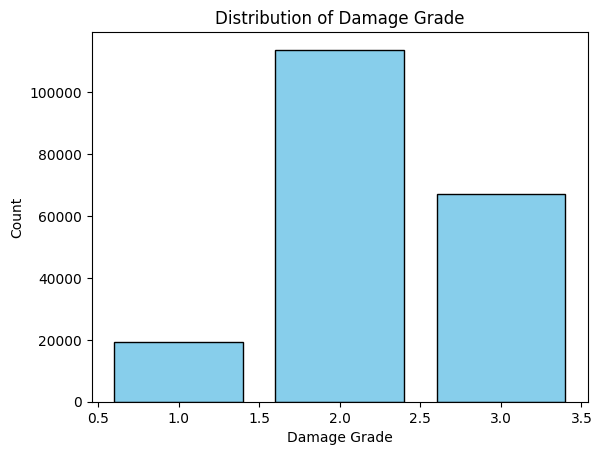

In [6]:
# ============================================================
# 4. Target variable: damage_grade
# ============================================================
counts = df[target_col].value_counts().sort_index()
plt.figure()
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.title("Distribution of Damage Grade")
plt.show()

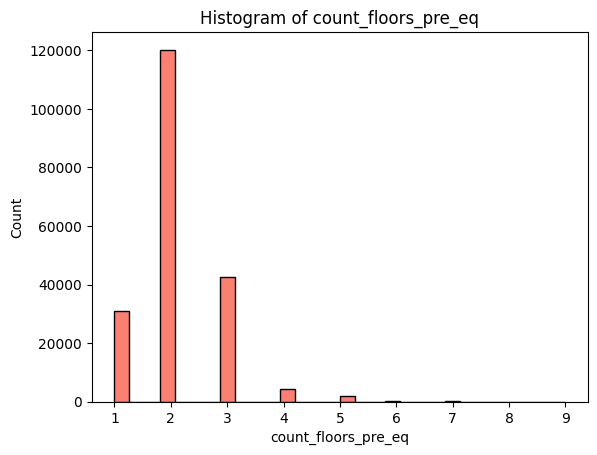

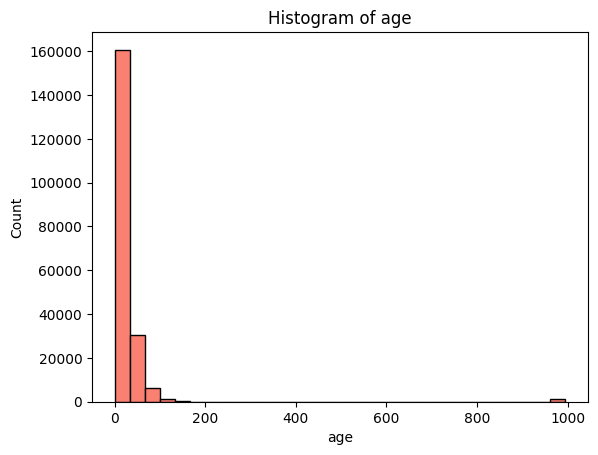

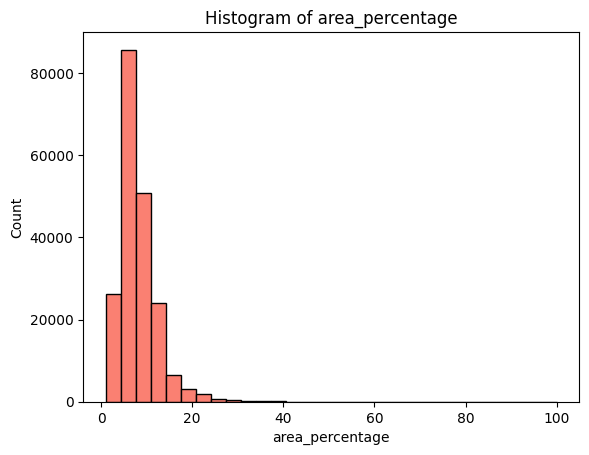

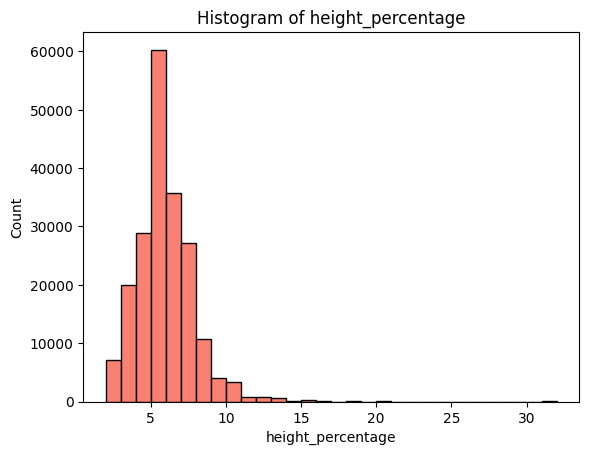

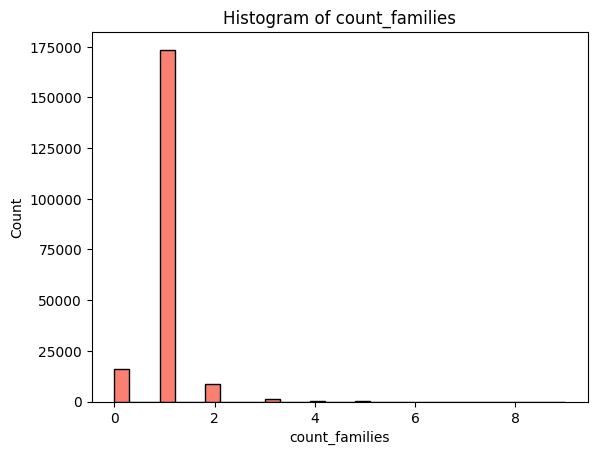

/tmp/ipykernel_637996/3104796394.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted(df[target_col].unique()))


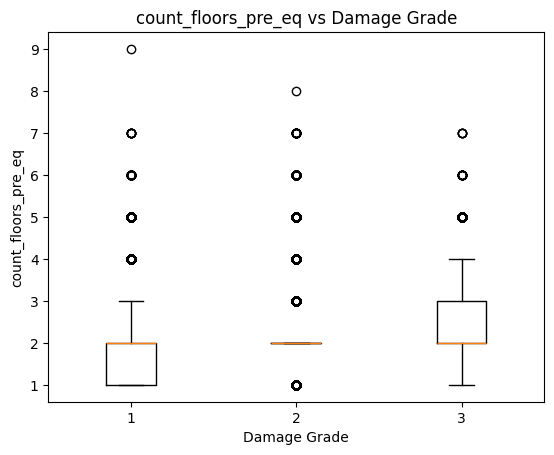

/tmp/ipykernel_637996/3104796394.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted(df[target_col].unique()))


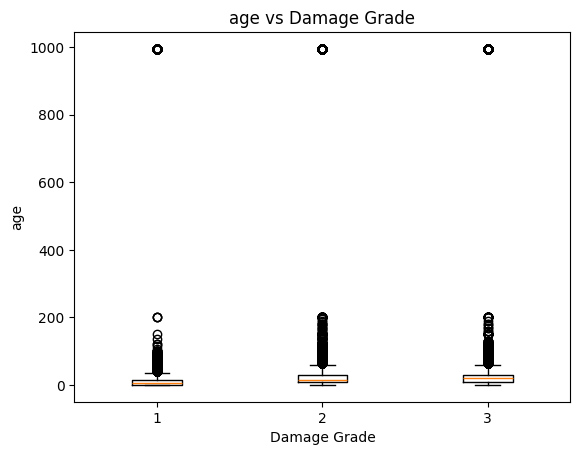

/tmp/ipykernel_637996/3104796394.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted(df[target_col].unique()))


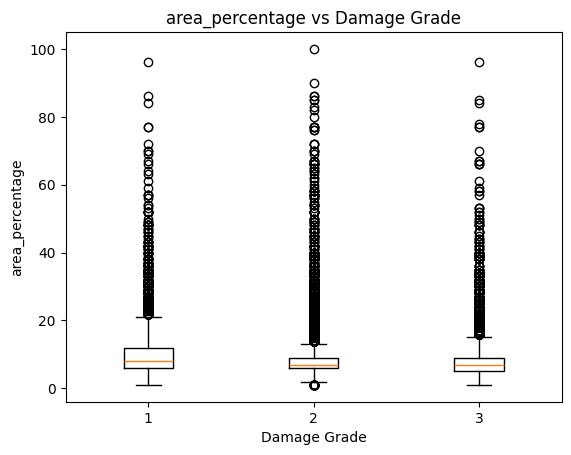

/tmp/ipykernel_637996/3104796394.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted(df[target_col].unique()))


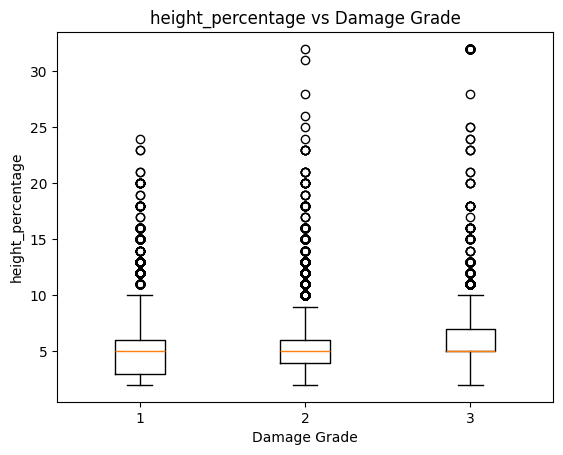

/tmp/ipykernel_637996/3104796394.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted(df[target_col].unique()))


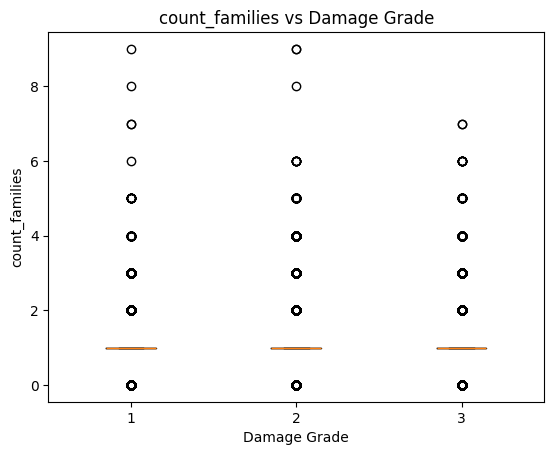

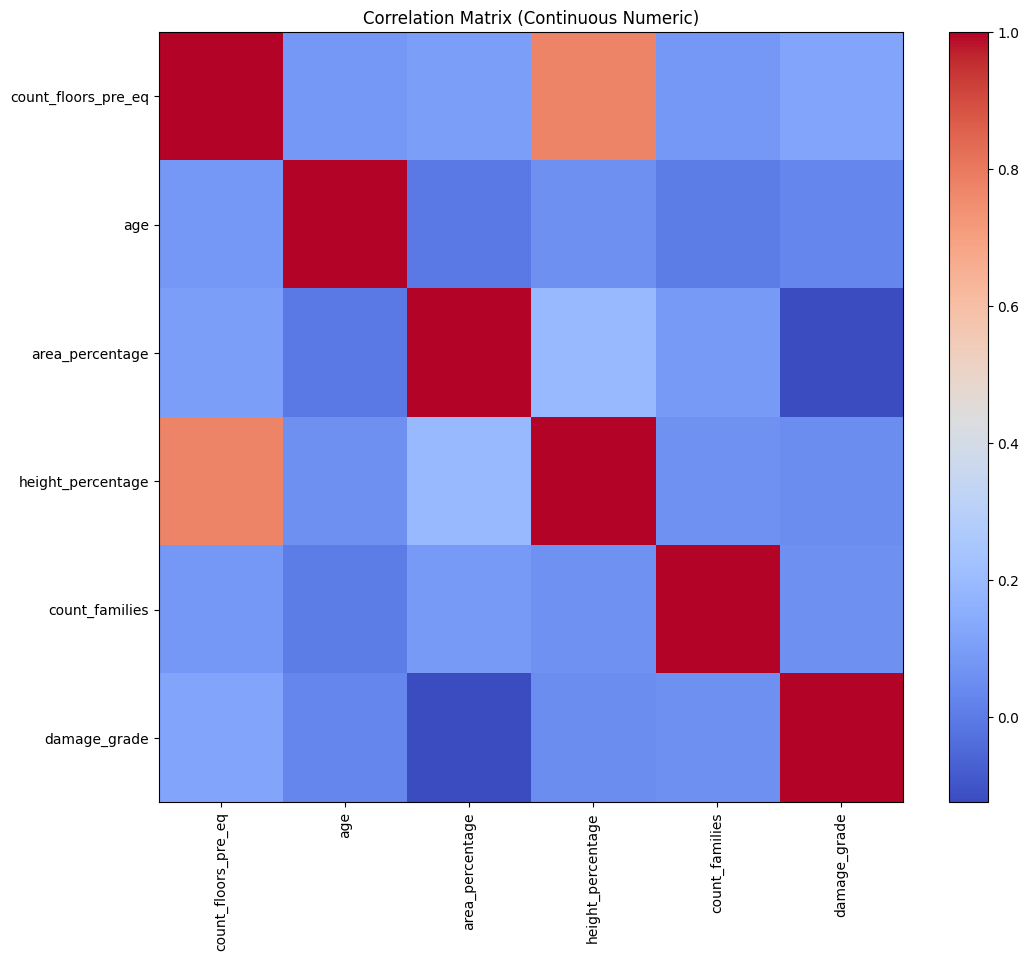

In [7]:
# ============================================================
# 5. Continuous numeric features
# ============================================================
# Histograms
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=30, color='salmon', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Boxplots vs target
for col in numeric_cols:
    plt.figure()
    data_to_plot = [df[df[target_col]==i][col] for i in sorted(df[target_col].unique())]
    plt.boxplot(data_to_plot, labels=sorted(df[target_col].unique()))
    plt.title(f"{col} vs Damage Grade")
    plt.xlabel("Damage Grade")
    plt.ylabel(col)
    plt.show()

# Correlation matrix
corr = df[numeric_cols + [target_col]].corr()
plt.figure(figsize=(12,10))
plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix (Continuous Numeric)")
plt.show()


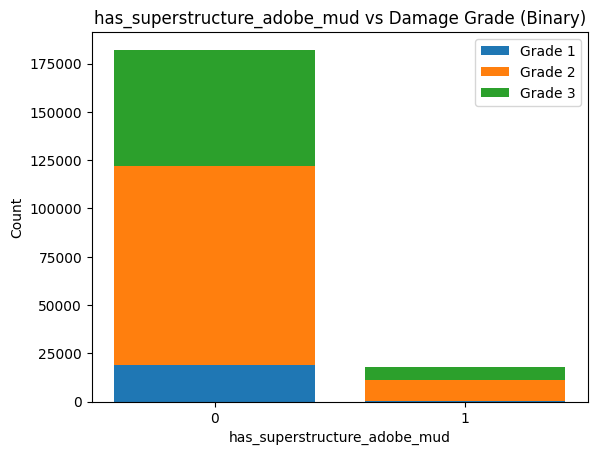

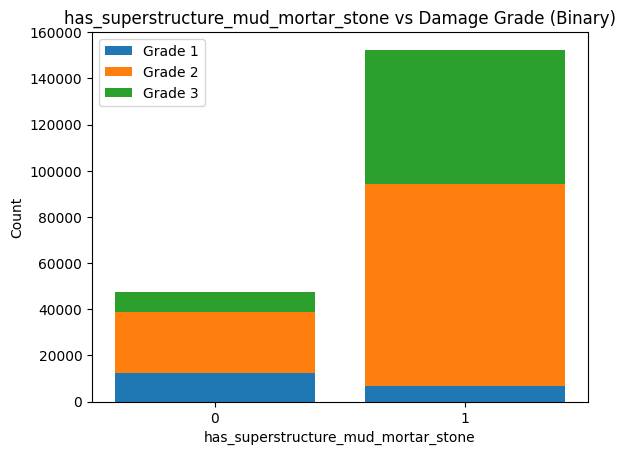

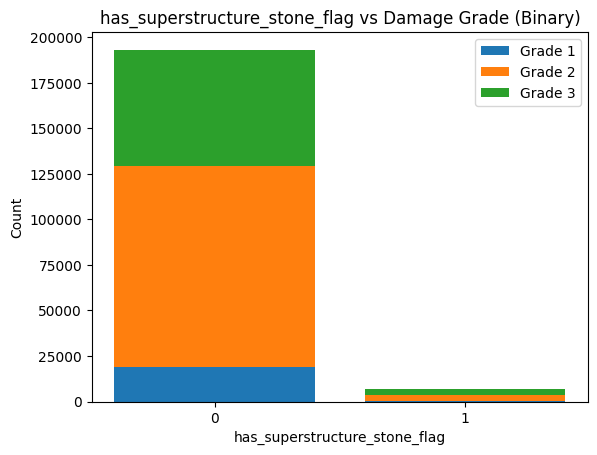

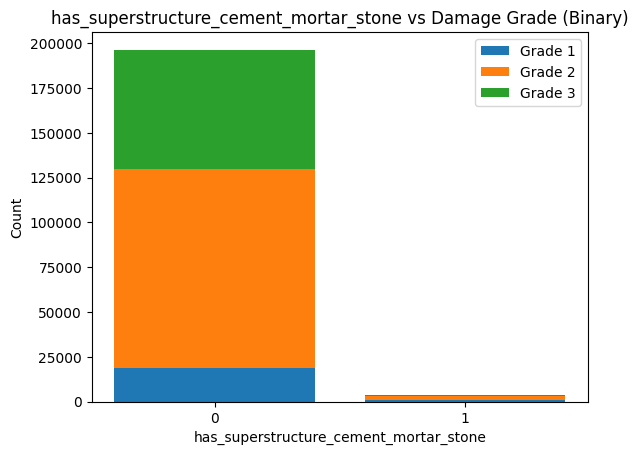

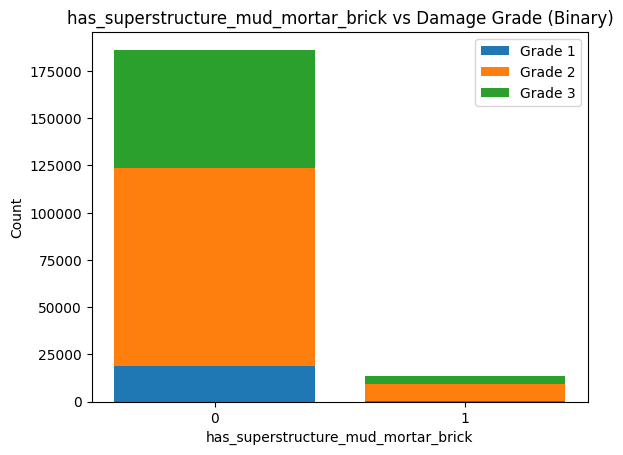

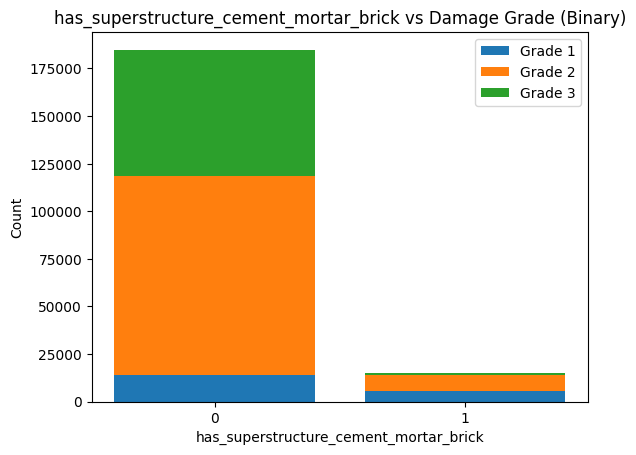

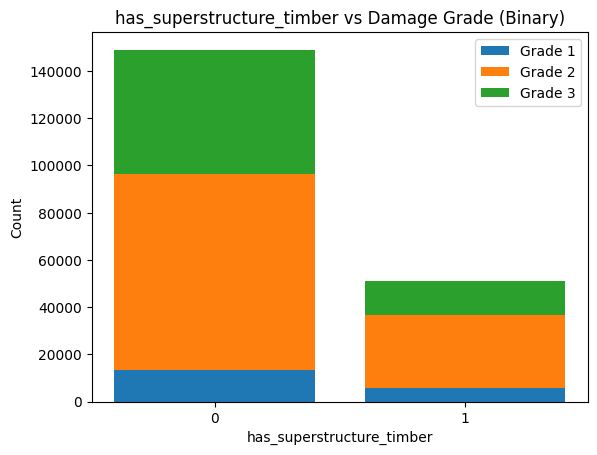

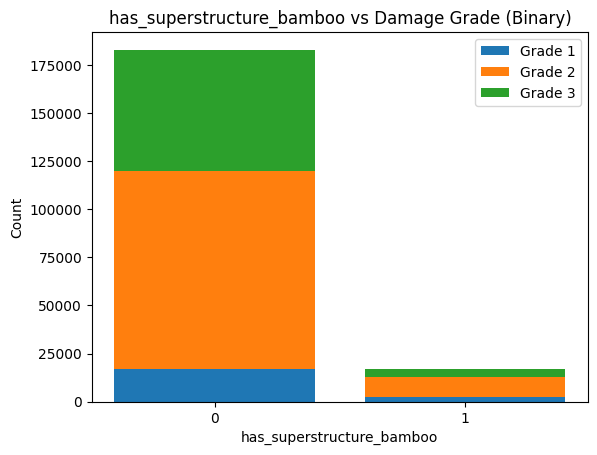

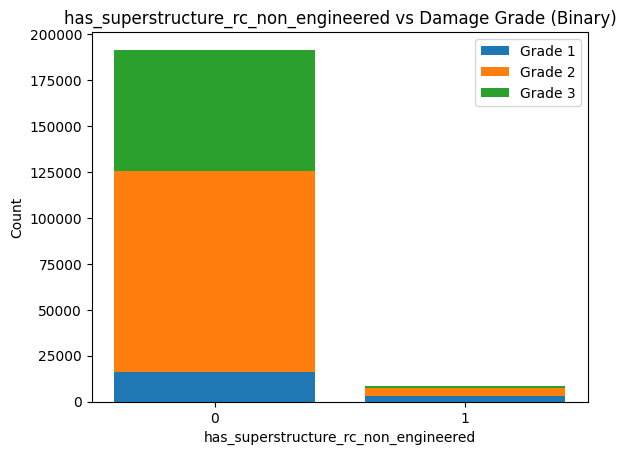

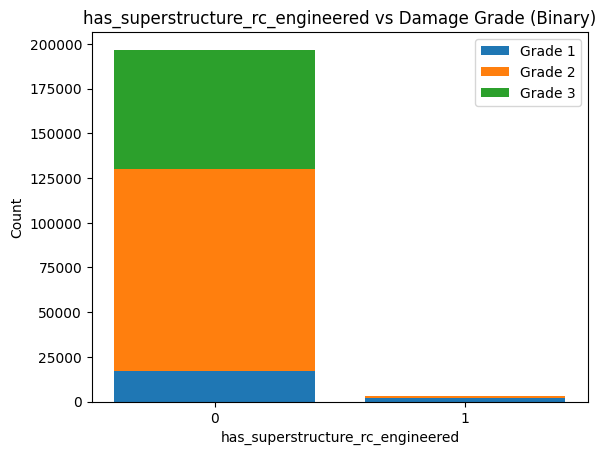

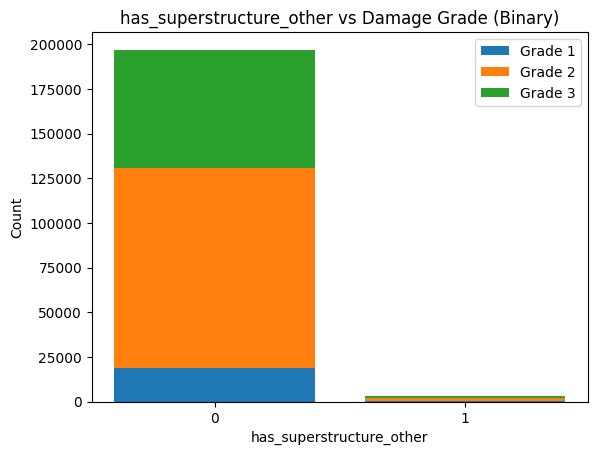

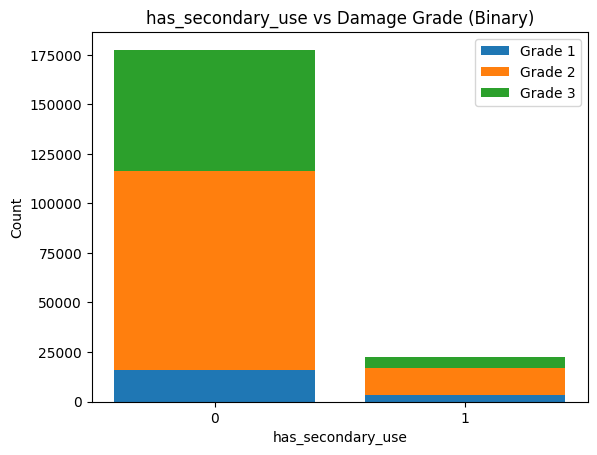

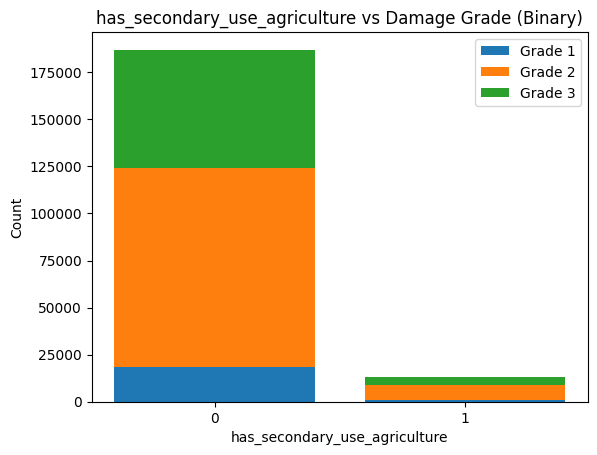

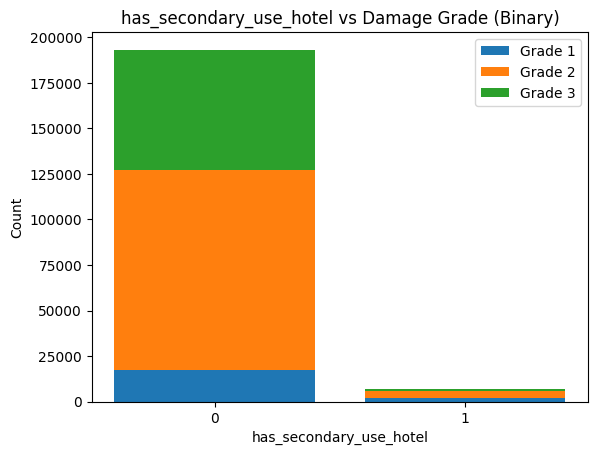

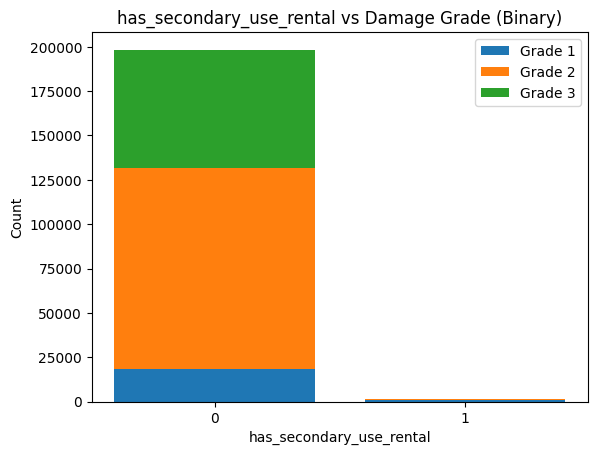

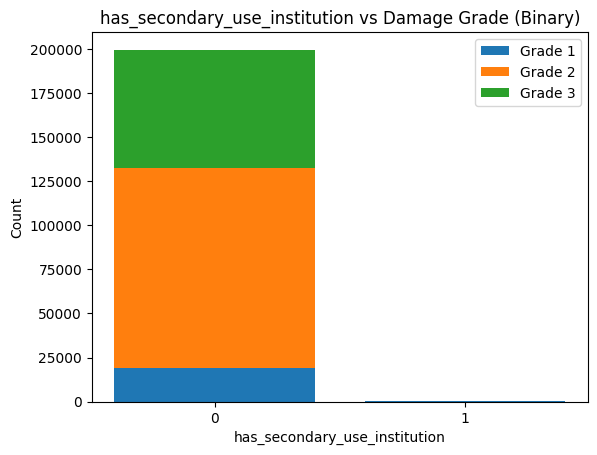

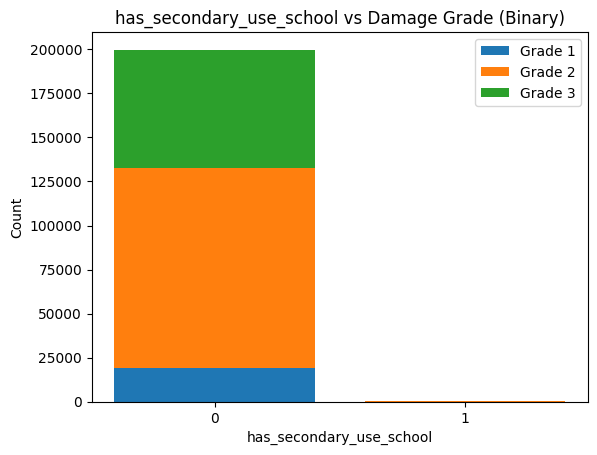

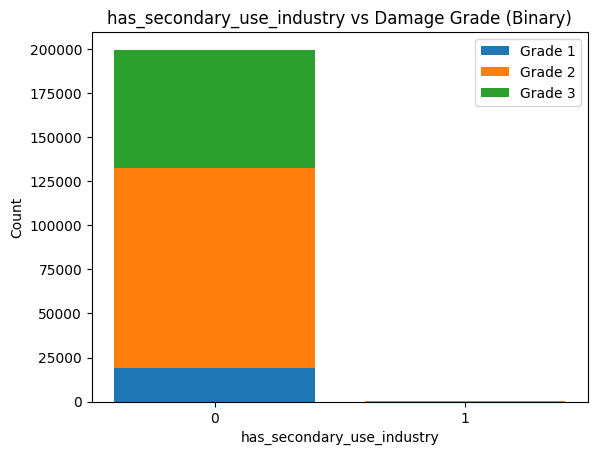

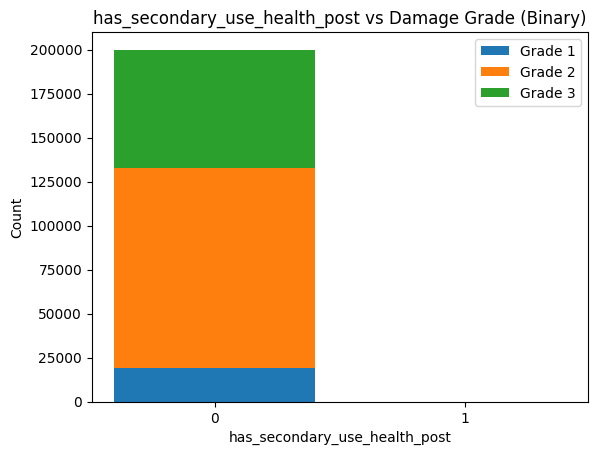

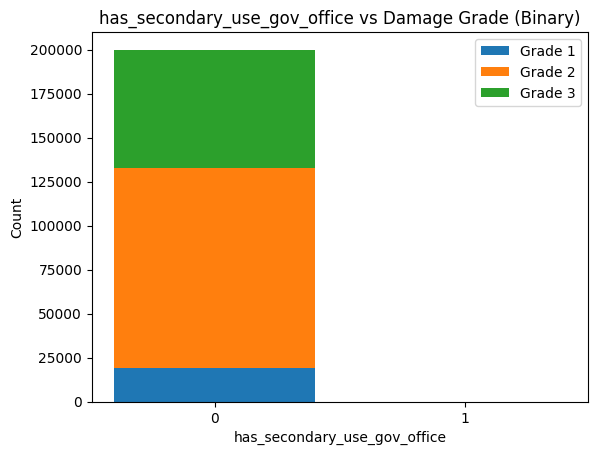

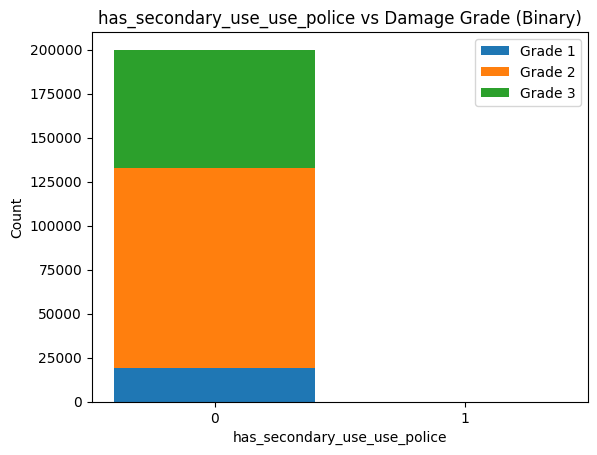

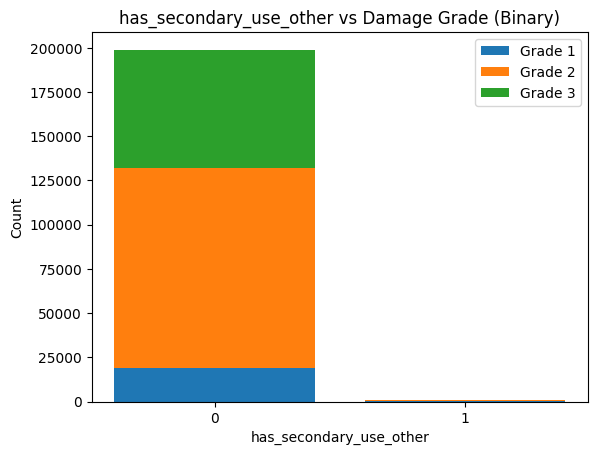

In [8]:
# ============================================================
# 6. Binary numeric features
# ============================================================
for col in binary_cols:
    plt.figure()
    categories = [0, 1]
    values = [df[df[col]==val][target_col].value_counts().reindex(sorted(df[target_col].unique()), fill_value=0) for val in categories]
    values = np.array(values).T
    bottom = np.zeros(len(categories))
    for i, grade in enumerate(sorted(df[target_col].unique())):
        plt.bar(categories, values[i], bottom=bottom, label=f"Grade {grade}")
        bottom += values[i]
    plt.title(f"{col} vs Damage Grade (Binary)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks([0,1])
    plt.legend()
    plt.show()

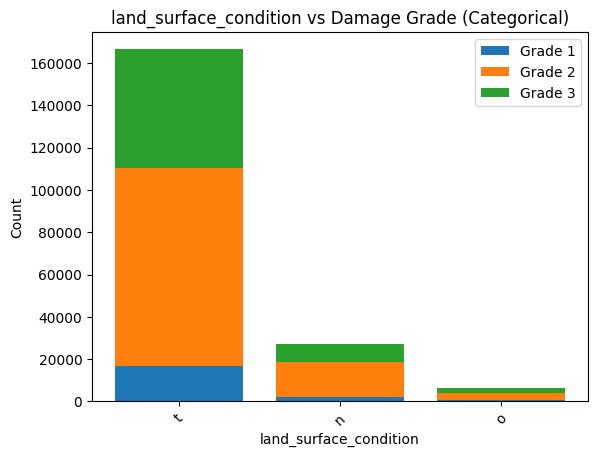

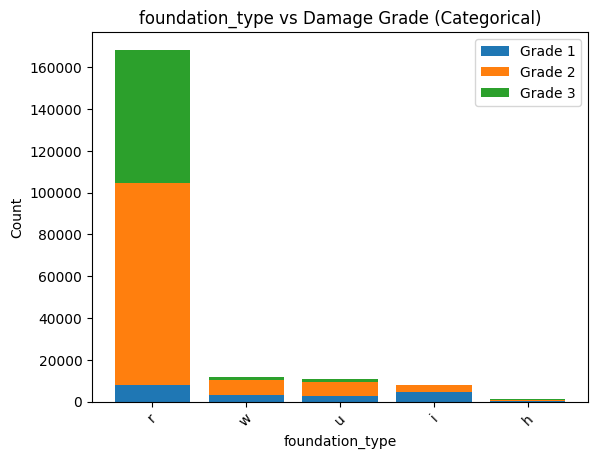

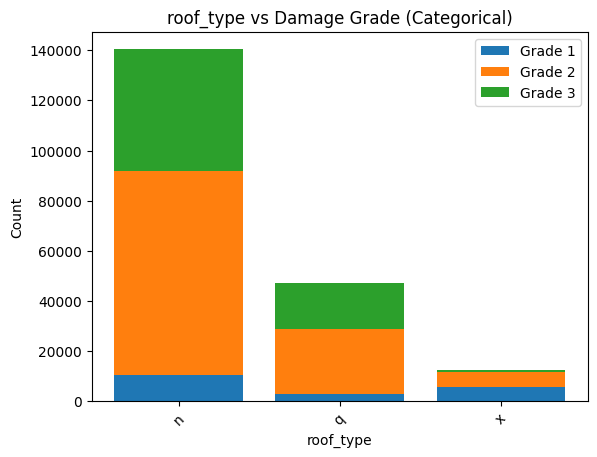

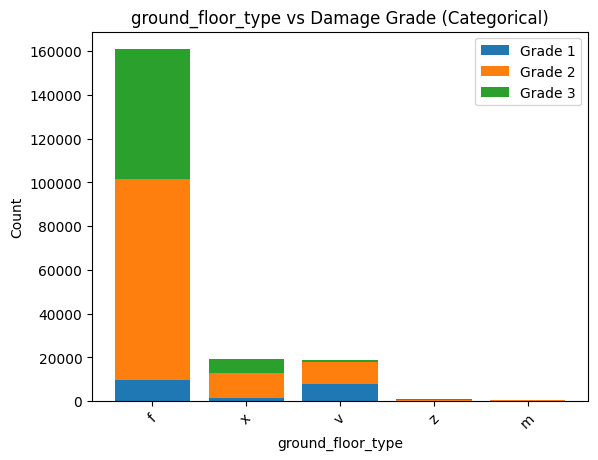

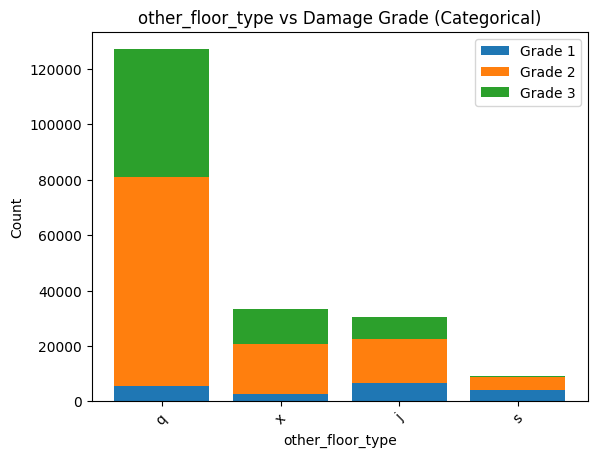

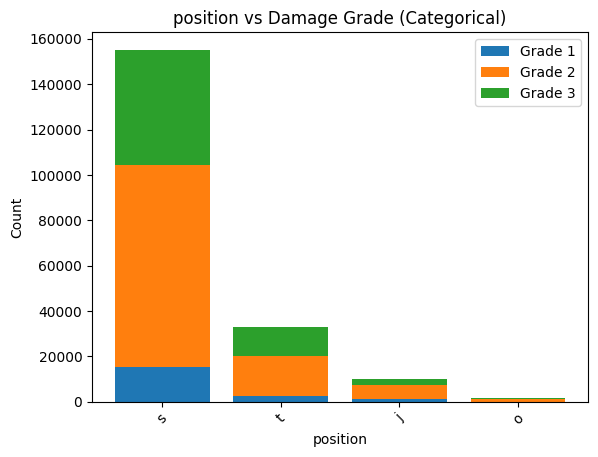

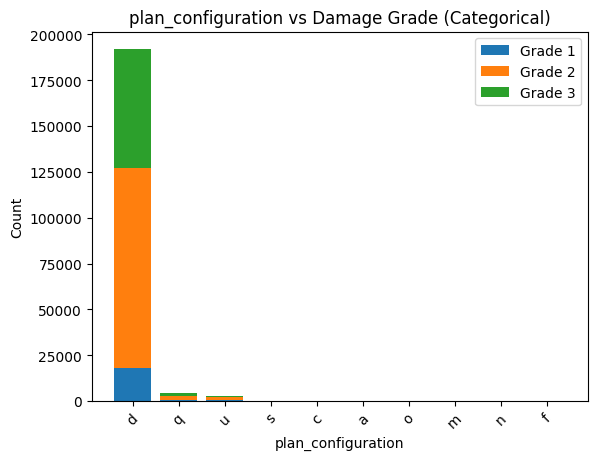

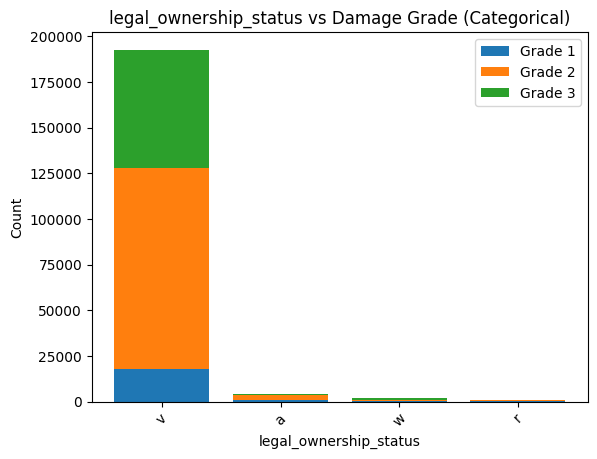

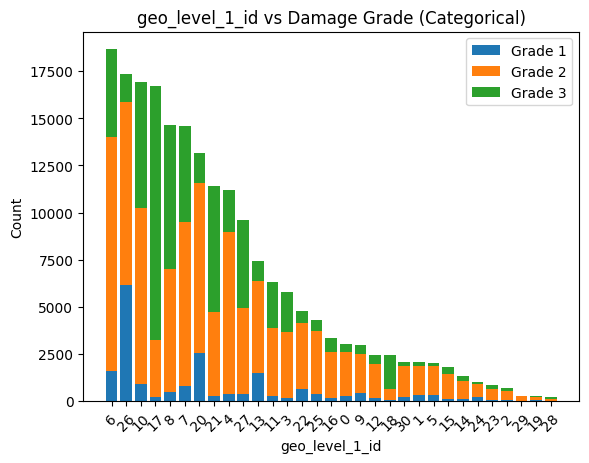

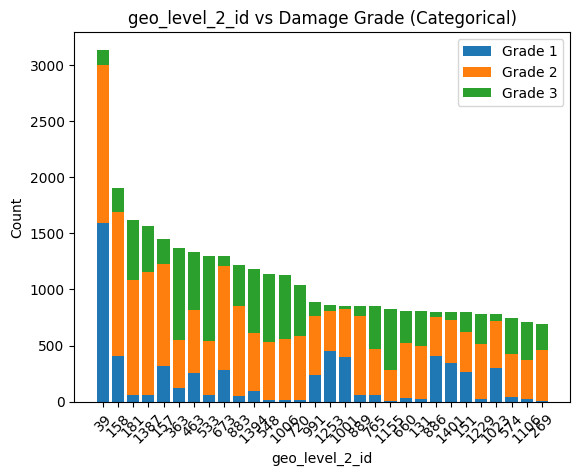

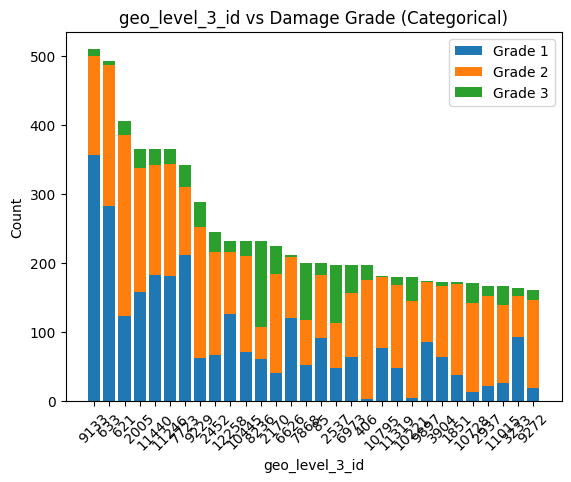

In [10]:
# ============================================================
# 7. Categorical features (with top-k for high-cardinality geo)
# ============================================================
top_k = 30  # for level 2 and 3 only

for col in categorical_cols:
    plt.figure()
    
    # handle geo_level_2_id and geo_level_3_id
    if col in ["geo_level_2_id", "geo_level_3_id"]:
        categories = df[col].value_counts().head(top_k).index.tolist()
        df_plot = df[df[col].isin(categories)]
    else:
        categories = df[col].value_counts().index.tolist()
        df_plot = df
    
    values = [
        df_plot[df_plot[col]==cat]['damage_grade'].value_counts()
        .reindex(sorted(df[target_col].unique()), fill_value=0)
        for cat in categories
    ]
    
    values = np.array(values).T  # damage_grade x categories
    bottom = np.zeros(len(categories))
    
    for i, grade in enumerate(sorted(df[target_col].unique())):
        plt.bar(categories, values[i], bottom=bottom, label=f"Grade {grade}")
        bottom += values[i]
    
    plt.title(f"{col} vs Damage Grade (Categorical)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


## Eda for test data

In [7]:
# ============================================================
# 1. Load data
# ============================================================
df_test = pd.read_csv("data/nepal_test.csv")
print("Dataset shape:", df_test.shape)
print("Columns:", df_test.columns.tolist())

Dataset shape: (60601, 39)
Columns: ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_of

In [13]:
# ============================================================
# 2. Convert geo columns to categorical
# ============================================================
for col in geo_cols:
    df_test[col] = df_test[col].astype(str)

In [15]:
for col in geo_cols:
    train_levels = set(df[col].unique())
    test_levels  = set(df_test[col].unique())

    missing_in_train = test_levels - train_levels

    print(f"\n=== {col} ===")
    print(f"Train unique: {len(train_levels)}")
    print(f"Test unique:  {len(test_levels)}")

    if len(missing_in_train) == 0:
        print("All test levels appear in training.")
    else:
        print(f"❌ Missing {len(missing_in_train)} levels in training:")
        print(sorted(list(missing_in_train))[:20])  # print first 20 only
        if len(missing_in_train) > 20:
            print("...(more omitted)")


=== geo_level_1_id ===
Train unique: 31
Test unique:  31
All test levels appear in training.

=== geo_level_2_id ===
Train unique: 1408
Test unique:  1352
❌ Missing 6 levels in training:
['1163', '1239', '1263', '1348', '737', '975']

=== geo_level_3_id ===
Train unique: 11298
Test unique:  9625
❌ Missing 297 levels in training:
['10039', '10086', '10097', '1012', '10163', '10172', '10193', '10194', '10198', '10211', '10215', '10225', '10247', '10279', '10304', '10324', '10329', '10348', '10394', '10467']
...(more omitted)


In [12]:
train_levels

{'8999',
 '8870',
 '3074',
 '5025',
 '3412',
 '9600',
 '7127',
 '11187',
 '3969',
 '10796',
 '2976',
 '3914',
 '2767',
 '5628',
 '4487',
 '12249',
 '3977',
 '6158',
 '2551',
 '3710',
 '6029',
 '10141',
 '8053',
 '4649',
 '11029',
 '2850',
 '5630',
 '2307',
 '4116',
 '2591',
 '11277',
 '9192',
 '6155',
 '9993',
 '4709',
 '424',
 '4616',
 '2515',
 '9814',
 '11636',
 '7982',
 '1961',
 '805',
 '7497',
 '8579',
 '11474',
 '4489',
 '5059',
 '6439',
 '2677',
 '3896',
 '8160',
 '849',
 '3375',
 '5140',
 '10051',
 '7672',
 '8246',
 '8343',
 '10622',
 '10282',
 '2957',
 '3900',
 '2276',
 '7808',
 '3938',
 '9603',
 '8876',
 '7249',
 '4819',
 '5644',
 '2250',
 '6370',
 '2862',
 '2277',
 '10397',
 '4949',
 '250',
 '9024',
 '3021',
 '5518',
 '6682',
 '74',
 '4383',
 '9517',
 '1513',
 '2168',
 '10189',
 '12448',
 '10767',
 '9511',
 '7279',
 '3775',
 '6647',
 '10232',
 '3944',
 '1138',
 '10430',
 '5114',
 '10681',
 '4430',
 '7809',
 '7096',
 '6870',
 '6386',
 '723',
 '4642',
 '4058',
 '9003',
 '5994',